- LinearRegression
- Ridge ($l_2$ - MSE)
- Lasso ($l_1$ - MAE)

In [1]:
# 사이킷런 공부용 패키지
!pip install mglearn

In [2]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)  # 60개의 회귀 샘플 뽑기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:
lr = LinearRegression().fit(X_train, y_train)

선형 회귀 모델에서는 가중치, 편향 값을 확인할 수 있다.

- 가중치(weight, cofficient) - coef_로 확인 가능
- 편향(offset, intercept, bias) - intercept_로 확인 가능

In [4]:
X_train.shape

(45, 1)

In [5]:
# 45개의 데이터, 1개의 feature
# x의 값에 대한 y값 1개만 확인 가능

In [6]:
# 따라서 가중치 : 1개
lr.coef_

array([0.39390555])

In [7]:
# 만약 입력 특성 갯수 2개 -> 기울기도 2개

In [8]:
# 편향
lr.intercept_

-0.031804343026759746

### 점수(결정계수) 확인하기

In [9]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [10]:
# 훈련 데이터, 테스트 데이터에 대한 점수 둘 다 안 좋음
# 과소적합 상태

### 과소적합인 상태

이유?

- 선형 회귀는 수학적 계산을 통해 나타난 가중치와 편향만을 이용하는 모델이다.
- 사용한 데이터 세트의 복잡도가 매우 낮다. ( 특성이 1개밖에 없음! )

In [11]:
# 보스턴 주택가격 데이터셋
# 그냥 load_data보다 특성이 많은 데이터
X, y =  mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [12]:
X.shape
# 특성의 갯수 104개

(506, 104)

In [13]:
# 선형 회귀는 feature의 개숫가 많을수록 모델이 복잡함

In [14]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [15]:
# 특성이 적은 데이터셋에 대한 선형 회귀 : 과소적합
# 특성이 많은 데이터셋에 대한 선형 회귀 : 과대적합
# 이 된 것을 봄..

### Ridge, Lasso 사용하기

- alpha 매개변수를 이용해서 가중치를 조절할 수 있다.
- alpha는 패널티이다.

- alpha, 가중치는 서로 반비례 관계
- alpha 증가 -> 가중치 감소
- alpha 감소 -> 가중치 증가

- 공통점 : 특성에 제한이 걸리는 모델이다.
- 차이점 :
  - Ridge : 
  - Lasso : 

In [16]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge().fit(X_train, y_train)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
# Ridge의 alpha의 기본값은 1.0이란 걸 알 수 있다.

print("ridge alpha 1.0일 때 훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("ridge alpha 1.0일 때 테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

ridge alpha 1.0일 때 훈련 세트 점수 : 0.89
ridge alpha 1.0일 때 테스트 세트 점수 : 0.75


In [18]:
# 점수가 올랐음.
# 기본 선형회귀보다 Ridge가 더 적합해보임.

In [19]:
# Ridge의 alpha를 10으로 줘보자.
# alpha 증가 -> 가중치 감소 -> 모델 단순해짐(복잡도 감소) -> 과소적합이 될 가능성이 크다.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("ridge alpha 10일 때 훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("ridge alpha 10일 때 테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

ridge alpha 10일 때 훈련 세트 점수 : 0.79
ridge alpha 10일 때 테스트 세트 점수 : 0.64


In [20]:
# 하이퍼 파라미터를 조절할 땐 log스케일로 조절하는 것이 좋음
# 증가시킬 땐 1, 10, 100,,, 10의 배수
# 감소시킬 땐 1, 0.1, 0.01,,,

In [21]:
# alpha 감소 -> 가중치 증가 -> 모델 복잡해짐(복잡도 증가) -> 과대적합이 될 가능성이 크다.
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("ridge alpha 0.1일 때 훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("ridge alpha 0.1일 때 테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

ridge alpha 0.1일 때 훈련 세트 점수 : 0.93
ridge alpha 0.1일 때 테스트 세트 점수 : 0.77


### alpha 값에 따른 가중치 시각화

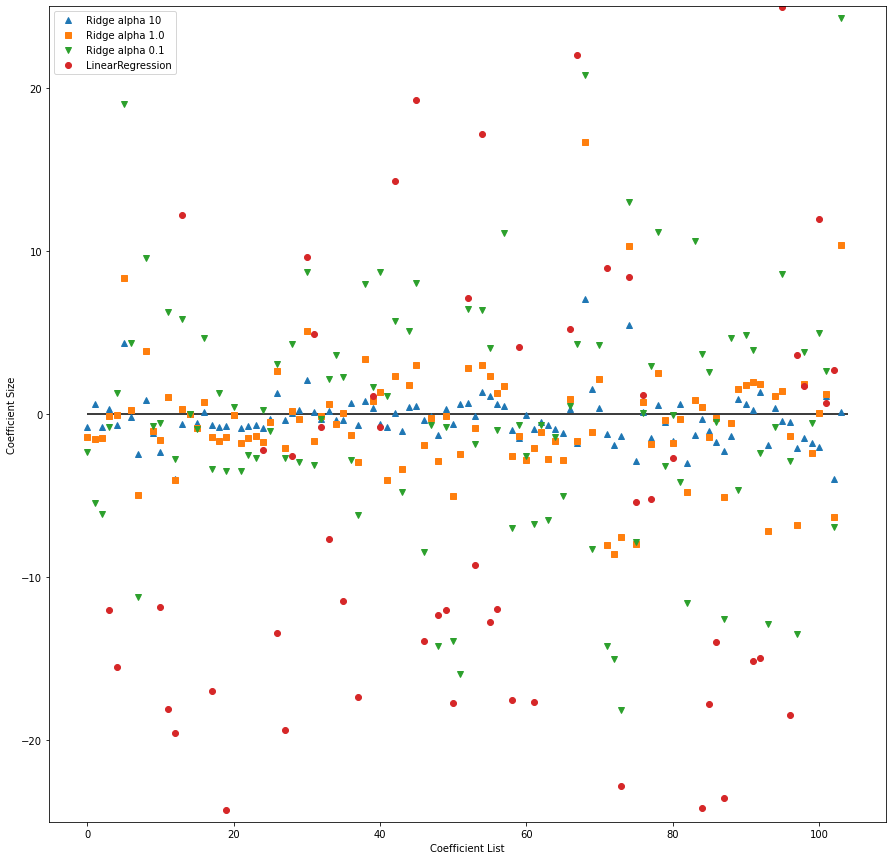

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,15))
plt.plot(ridge10.coef_, '^', label="Ridge alpha 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha 1.0")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

In [23]:
# y축 : 가중치의 크기
# x축 106개의 feature
# ridge10은 가중치가 0에 거의 가깝게 붙어있음
# ridge1.0은 중간정도
# ridge0.1은 가중치가 1.0일 때보다 더 높아짐
# 빨강점 : 일반 선형회귀 -> 가중치가 더 높음

# alpha 증가 -> 가중치 감소 이런 관계 파악

In [24]:
ridge00001 = Ridge(alpha=0.00001).fit(X_train, y_train)
print("{:.2f}".format(ridge00001.score(X_train, y_train)))
print("{:.2f}".format(ridge00001.score(X_test, y_test)))
# alpha 매우 낮추면 선형 회귀와 비슷해짐
# Ridge는 가중치를 조절할 수 있는 선형 모델이구나.

0.95
0.62


In [25]:
lasso = Lasso().fit(X_train, y_train)
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
import numpy as np
def print_score(model, train_x, train_y, test_x, test_y):
  print("훈련 세트 점수 : {:.2f}".format(model.score(train_x, train_y)))
  print("테스트 세트 점수 : {:.2f}".format(model.score(test_x, test_y)))
  print("사용한 특성의 수 : {}".format(np.sum(model.coef_ != 0)))

In [27]:
print_score(lasso, X_train, y_train, X_test, y_test)

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4


In [28]:
# 원래 피쳐가 106개였는 데 4개만 남기고 102개의 피쳐를 다 버림
# -> 너무 과소적합. 정확도 매우 낮음.
# -> 알파를 줄여야 함 -> 그래야지 가중치가 늘어나서 다른 피쳐들이 몇 개 더 포함됨

In [29]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# max_iter : 경사하강법 최대 반복 횟수
print_score(lasso001, X_train, y_train, X_test, y_test)

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 33


In [30]:
# 이번에는 피쳐 33개 선택됨

In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print_score(lasso00001, X_train, y_train, X_test, y_test)
# 과대적합됨.

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


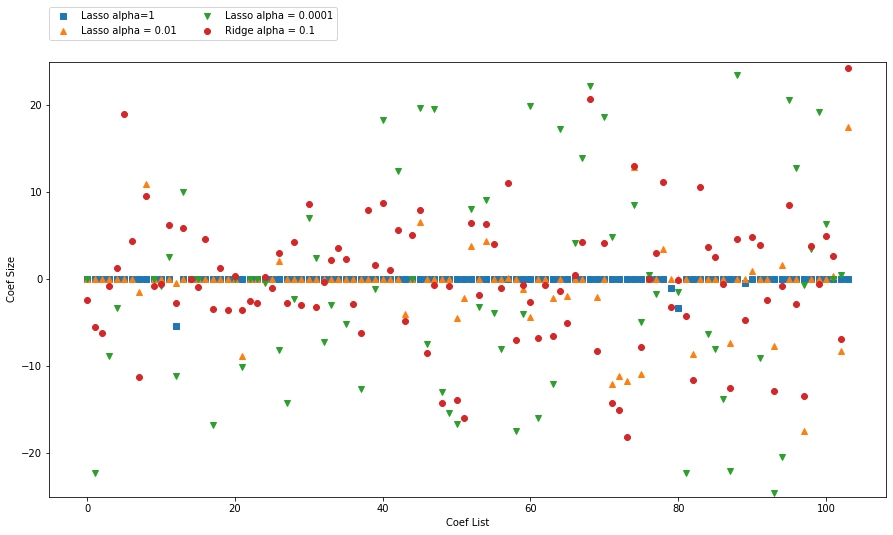

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coef List")
plt.ylabel("Coef Size")
plt.show()

In [35]:
# 릿지는 0에 가깝게 되지 0이 되지는 않음
# 랏쏘는 실제 0이 되는 값들도 있음

# 선형 사용하려면 릿지, 랏쏘 사용 추천
# 데이터의 양이 많다면(피쳐 말고 데이터!) 그냥 선형 회귀 추천

# 특성의 갯수가 많은 데 일부만 의미있을 때 랏쏘 사용